In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# train_data1 = pd.read_csv("D:\\Personal\\Msc\\Y1S1\\Advanced Data Mining\\GroupAssignment\\web-traffic-time-series-forecasting\\TrainingData\\train_1.csv").fillna(0)
train_data2 = pd.read_csv("D:\\Personal\\Msc\\Y1S1\\Advanced Data Mining\\GroupAssignment\\web-traffic-time-series-forecasting\\TrainingData\\train_2.csv").fillna(0)

In [3]:
train_data2.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,19.0,33.0,33.0,18.0,16.0,27.0,29.0,23.0,54.0,38.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,32.0,30.0,11.0,19.0,54.0,25.0,26.0,23.0,13.0,81.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,6.0,6.0,7.0,2.0,4.0,7.0,3.0,4.0,7.0,6.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,7.0,19.0,19.0,9.0,6.0,16.0,19.0,30.0,38.0,4.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.0,16.0,19.0,9.0,20.0,23.0,28.0,14.0,8.0,7.0


In [4]:
train_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 804 entries, Page to 2017-09-10
dtypes: float64(803), object(1)
memory usage: 889.8+ MB


In [5]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss
import matplotlib.pyplot as plt

# Load the time series data into a DataFrame
# Assuming your data is already in a DataFrame named df
# If not, replace df with your DataFrame containing the time series data

# Visual Inspection
# train_data2.plot(figsize=(10, 6))
# plt.title('Time Series Data')
# plt.xlabel('Date')
# plt.ylabel('Value')
# plt.show()

# # Summary Statistics
# rolling_mean = train_data2.rolling(window=30).mean()
# rolling_std = train_data2.rolling(window=30).std()

# plt.plot(train_data2, color='blue', label='Original')
# plt.plot(rolling_mean, color='red', label='Rolling Mean')
# plt.plot(rolling_std, color='green', label='Rolling Std')
# plt.legend()
# plt.title('Rolling Mean & Standard Deviation')
# plt.show()

# ADF Test
result_adf = adfuller(train_data2)
print('ADF Statistic:', result_adf[0])
print('p-value:', result_adf[1])
print('Critical Values:')
for key, value in result_adf[4].items():
    print(f'   {key}: {value}')

# KPSS Test
result_kpss = kpss(train_data2)
print('\nKPSS Statistic:', result_kpss[0])
print('p-value:', result_kpss[1])
print('Critical Values:')
for key, value in result_kpss[3].items():
    print(f'   {key}: {value}')


ValueError: could not convert string to float: '2NE1_zh.wikipedia.org_all-access_spider'

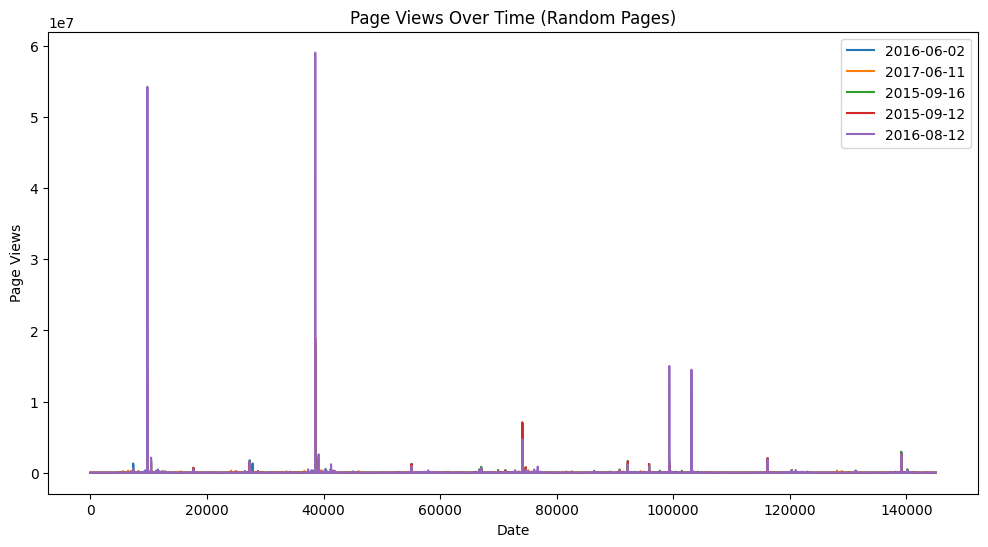

In [56]:
# Visualize the time series data for a few random pages
random_pages = np.random.choice(train_data2.columns[1:], 5, replace=False)  # choose 5 random pages
plt.figure(figsize=(12, 6))
for page in random_pages:
    plt.plot(train_data2[page], label=page)
plt.title('Page Views Over Time (Random Pages)')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.legend()
plt.show()

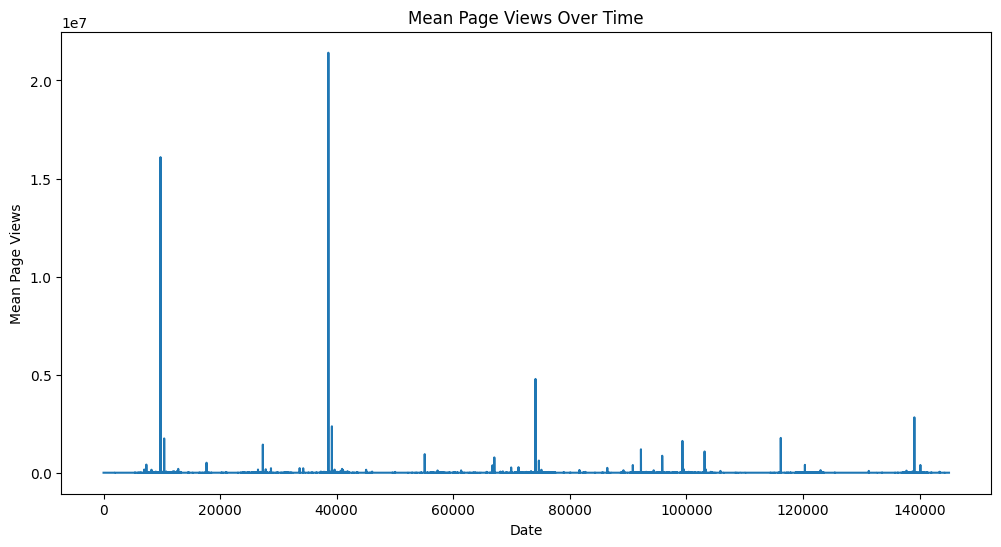

In [57]:
import seaborn as sns

# Check for trends and seasonality
plt.figure(figsize=(12, 6))
sns.lineplot(data=train_data2.iloc[:, 1:].mean(axis=1))
plt.title('Mean Page Views Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Page Views')
plt.show()

Get the language of a given page

In [6]:
import re # to separate pages based on language (regular expression)

def find_language(url):
    res = re.search('[a-z][a-z].wikipedia.org',url)
    if res:
        return res[0][0:2]
    return 'na'

train_data2['lang'] = train_data2.Page.map(find_language)

Separate all the pages based on their language and average them up to find views per page per language

In [7]:
lang_sets = {}
lang_sets['en'] = train_data2[train_data2.lang=='en'].iloc[:,0:-1]
lang_sets['ja'] = train_data2[train_data2.lang=='ja'].iloc[:,0:-1]
lang_sets['de'] = train_data2[train_data2.lang=='de'].iloc[:,0:-1]
lang_sets['na'] = train_data2[train_data2.lang=='na'].iloc[:,0:-1]
lang_sets['fr'] = train_data2[train_data2.lang=='fr'].iloc[:,0:-1]
lang_sets['zh'] = train_data2[train_data2.lang=='zh'].iloc[:,0:-1]
lang_sets['ru'] = train_data2[train_data2.lang=='ru'].iloc[:,0:-1]
lang_sets['es'] = train_data2[train_data2.lang=='es'].iloc[:,0:-1]

sums = {}
for key in lang_sets:
    print(f"Key: {key}")
    sums[key] = lang_sets[key].iloc[:,1:].sum(axis=0) / lang_sets[key].shape[0]
    print(lang_sets[key].iloc[:,1:].sum(axis=0))
    break


Key: en
2015-07-01    84712190.0
2015-07-02    84438545.0
2015-07-03    80167728.0
2015-07-04    83463204.0
2015-07-05    86198637.0
                 ...    
2017-09-06    92862934.0
2017-09-07    97701973.0
2017-09-08    74417827.0
2017-09-09    71919663.0
2017-09-10    75370705.0
Length: 803, dtype: float64


In [64]:
type(sums)

dict

In [60]:
sums

{'en': 2015-07-01    3513.862203
 2015-07-02    3502.511407
 2015-07-03    3325.357889
 2015-07-04    3462.054256
 2015-07-05    3575.520035
                  ...     
 2017-09-06    3851.955119
 2017-09-07    4052.678488
 2017-09-08    3086.851958
 2017-09-09    2983.228099
 2017-09-10    3126.377344
 Length: 803, dtype: float64,
 'ja': 2015-07-01    580.647056
 2015-07-02    666.672801
 2015-07-03    602.289805
 2015-07-04    756.509177
 2015-07-05    725.720914
                  ...    
 2017-09-06    572.449856
 2017-09-07    634.495277
 2017-09-08    572.227253
 2017-09-09    611.708825
 2017-09-10    682.201361
 Length: 803, dtype: float64,
 'de': 2015-07-01    714.968405
 2015-07-02    705.229741
 2015-07-03    676.877231
 2015-07-04    621.145145
 2015-07-05    722.076185
                  ...    
 2017-09-06    667.134793
 2017-09-07    768.744110
 2017-09-08    631.135979
 2017-09-09    587.832803
 2017-09-10    656.901062
 Length: 803, dtype: float64,
 'na': 2015-07-01     8

Plots of average number of views for all different languages per day

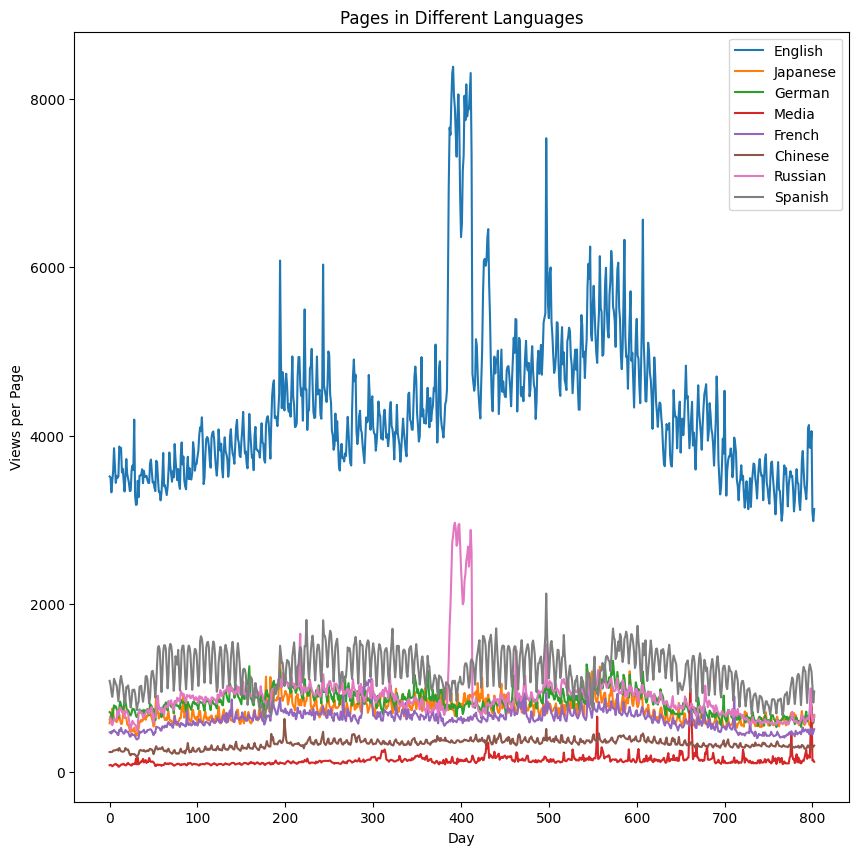

In [26]:
days = [r for r in range(sums['en'].shape[0])]

fig = plt.figure(1,figsize=[10,10])
plt.ylabel('Views per Page')
plt.xlabel('Day')
plt.title('Pages in Different Languages')
labels={'en':'English','ja':'Japanese','de':'German',
        'na':'Media','fr':'French','zh':'Chinese',
        'ru':'Russian','es':'Spanish'
       }

for key in sums:
    plt.plot(days,sums[key],label = labels[key] )
    
plt.legend()
plt.show()

Plot Autocorrelation and Partial Autocorrelation graphs for all these languages, to estimate the hyperparameters used in training the ARIMA model.

en


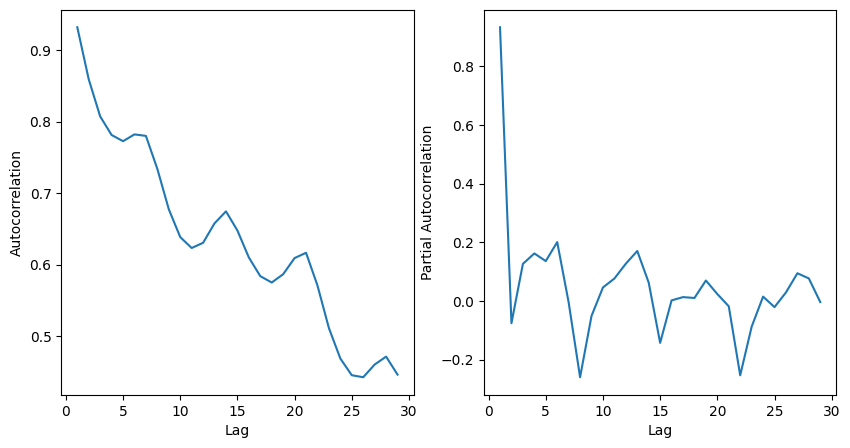

ja


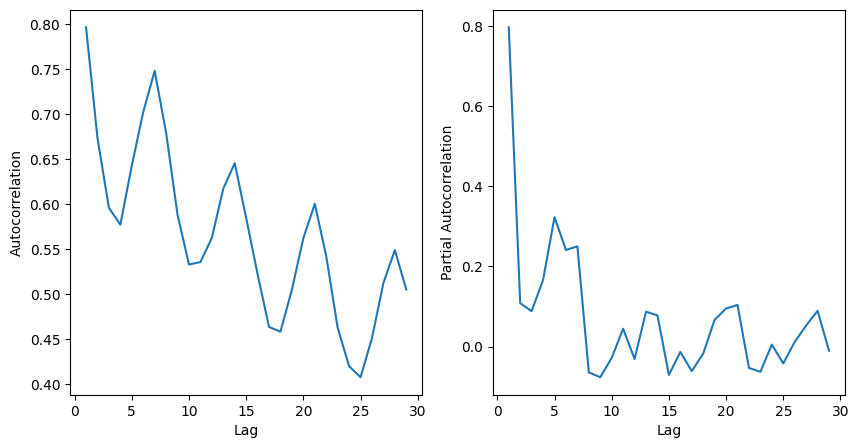

de


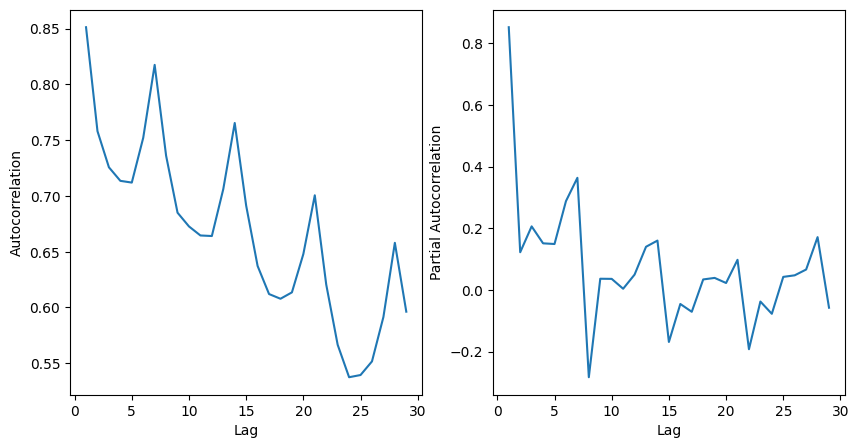

na


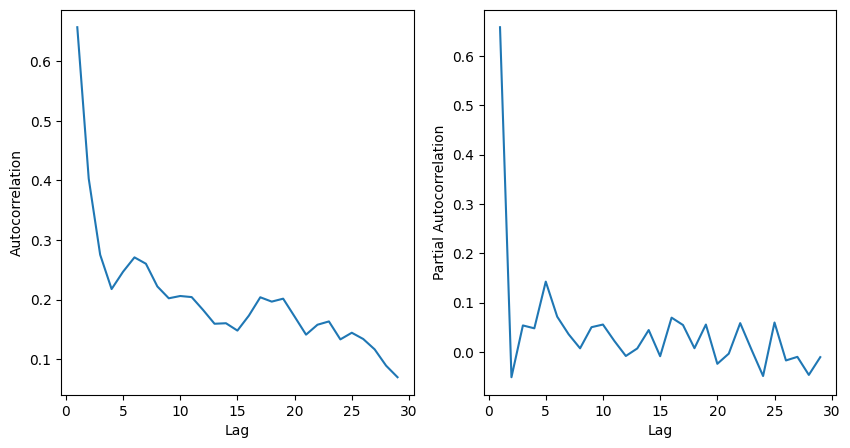

fr


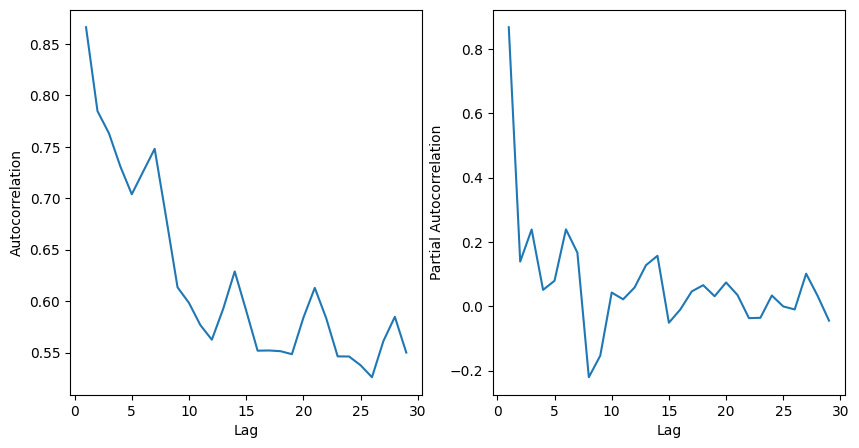

zh


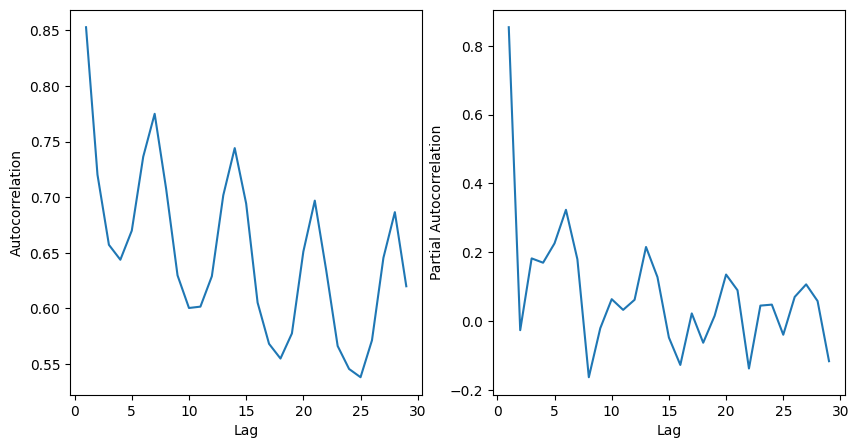

ru


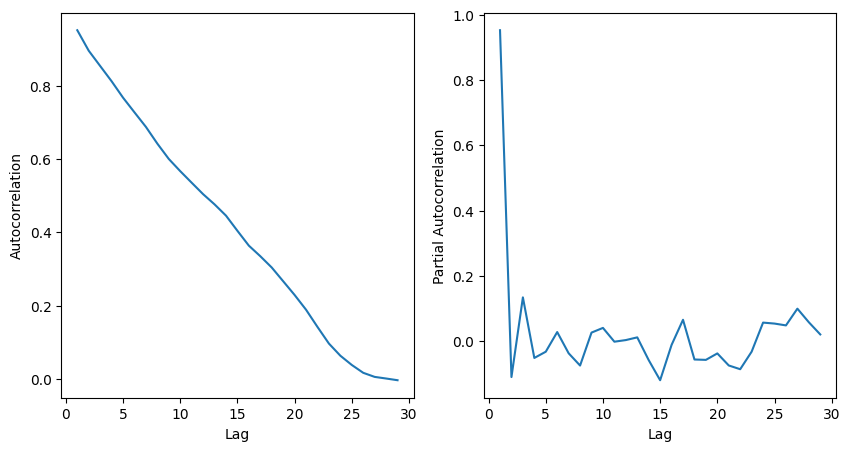

es


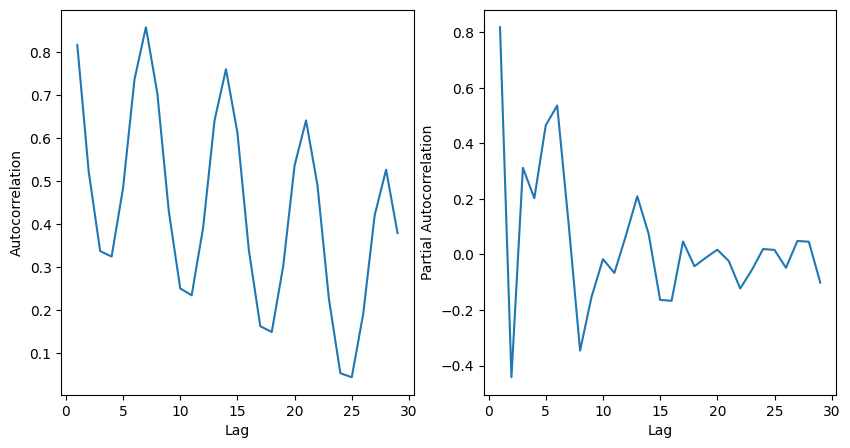

In [27]:
from statsmodels.tsa.arima_model import ARIMA # to make an ARIMA model that fits the data
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf

for key in sums:
    fig = plt.figure(1,figsize=[10,5])
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    data = np.array(sums[key])
    autocorr = acf(data)
    pac = pacf(data)

    x = [x for x in range(len(pac))]
    ax1.plot(x[1:],autocorr[1:])

    ax2.plot(x[1:],pac[1:])
    ax1.set_xlabel('Lag')
    ax1.set_ylabel('Autocorrelation')

    ax2.set_xlabel('Lag')
    ax2.set_ylabel('Partial Autocorrelation')
    print(key)
    plt.show()

In [8]:
def smape(y_true, y_pred):
    """
    Calculate Symmetric Mean Absolute Percentage Error (SMAPE)
    """
    numerator = np.abs(y_true - y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    return np.mean(numerator / denominator) * 100


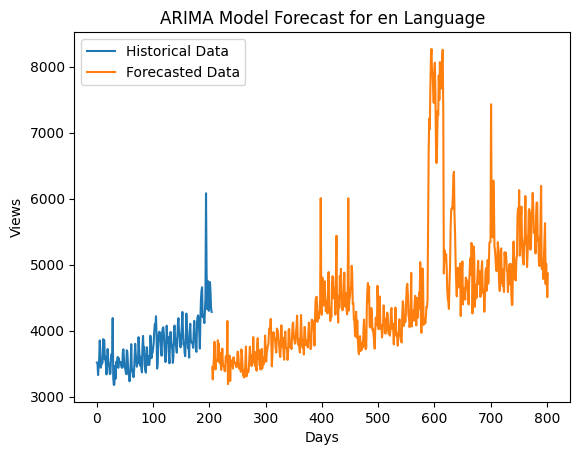

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

params = {'en': [4, 1, 0], 'ja': [7, 1, 1], 'de': [7, 1, 1], 'na': [4, 1, 0], 'fr': [4, 1, 0], 'zh': [7, 1, 1], 'ru': [4, 1, 0], 'es': [7, 1, 1]}

for key in sums:
    data = np.array(sums[key])
    arima = ARIMA(data, order=params[key])
    result = arima.fit()
    pred = result.predict(start=2, end=599, type='levels')
    
    # Plot original data up to a certain date
    historical_data = data[:len(data) - len(pred)]
    historical_x = [i for i in range(len(historical_data))]
    plt.plot(historical_x, historical_data, label='Historical Data')
    
    # Plot forecasted values for future dates
    forecasted_x = [i for i in range(len(historical_data), len(data))]
    plt.plot(forecasted_x, pred, label='Forecasted Data')
    
    plt.xlabel('Days')
    plt.ylabel('Views')
    plt.legend()
    plt.title(f'ARIMA Model Forecast for {key} Language')
    plt.show()


ValueError: x and y must have same first dimension, but have shapes (598,) and (803,)

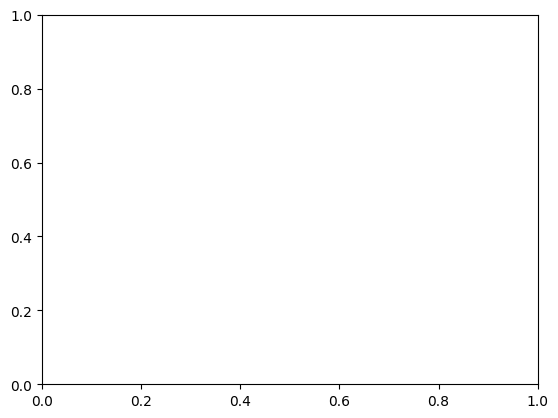

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

params = {'en': [4, 1, 0], 'ja': [7, 1, 1], 'de': [7, 1, 1], 'na': [4, 1, 0], 'fr': [4, 1, 0], 'zh': [7, 1, 1], 'ru': [4, 1, 0], 'es': [7, 1, 1]}

for key in sums:
    data = np.array(sums[key])
    arima = ARIMA(data, order=params[key])
    result = arima.fit()
    pred = result.predict(start=2, end=599, type='levels')
    x = [i for i in range(600)]
    
    plt.plot(x[2:len(data)], data, label='Data')
    plt.plot(x[2:], pred, label='ARIMA Model')
    plt.xlabel('Days')
    plt.ylabel('Views')
    plt.legend()
    plt.show()
    # min_length = min(len(data), len(pred))
    # data = data[:min_length]
    # pred = pred[:min_length]

    # Plot original data and ARIMA model predictions
    print("Language:", key)

    smape_value = smape(data, pred)
    print("SMAPE:", smape_value)
    
    plt.plot(data, label='Original Data')
    plt.plot(pred, label='ARIMA Model')

    # Other plotting configurations (labels, legend, etc.)
    plt.xlabel('Days')
    plt.ylabel('Views')
    plt.legend()
    plt.show()

In [ ]:
# def smape(y_true, y_pred):
#     """
#     Calculate Symmetric Mean Absolute Percentage Error (SMAPE)
#     """
#     numerator = np.abs(y_true - y_pred)
#     denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
#     return np.mean(numerator / denominator) * 100

# # Assuming data and pred are numpy arrays
# smape_value = smape(data, pred)
# print("SMAPE:", smape_value)

Use the predictions of these models as one of the inputs to our ensemble model

Create another LSTM model for ensemble

In [32]:
train_data2.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10,lang
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,33.0,33.0,18.0,16.0,27.0,29.0,23.0,54.0,38.0,zh
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,30.0,11.0,19.0,54.0,25.0,26.0,23.0,13.0,81.0,zh
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,6.0,7.0,2.0,4.0,7.0,3.0,4.0,7.0,6.0,zh
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,19.0,19.0,9.0,6.0,16.0,19.0,30.0,38.0,4.0,zh
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.0,19.0,9.0,20.0,23.0,28.0,14.0,8.0,7.0,zh


Training LSTM models for top pages of all the languages as a demo

In [33]:
train_data2 = train_data2.drop('Page',axis = 1)
train_data2.shape

(145063, 804)

In [34]:
#Packages for pre processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

 # Importing the Keras libraries and packages for LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

8/8 [==============================] - 0s 1ms/step
SMAPE for en: 19.38


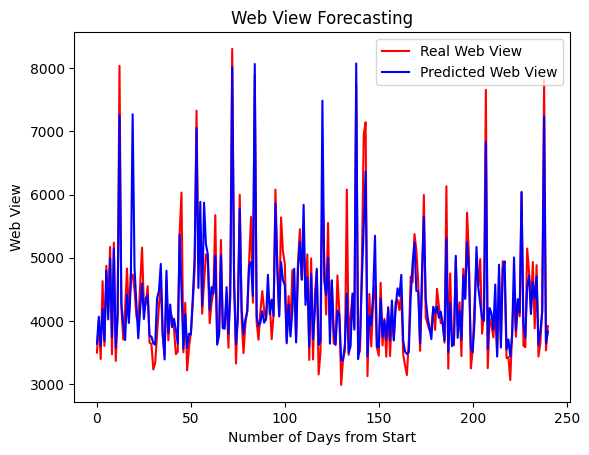

8/8 [==============================] - 0s 1000us/step
SMAPE for ja: 13.97


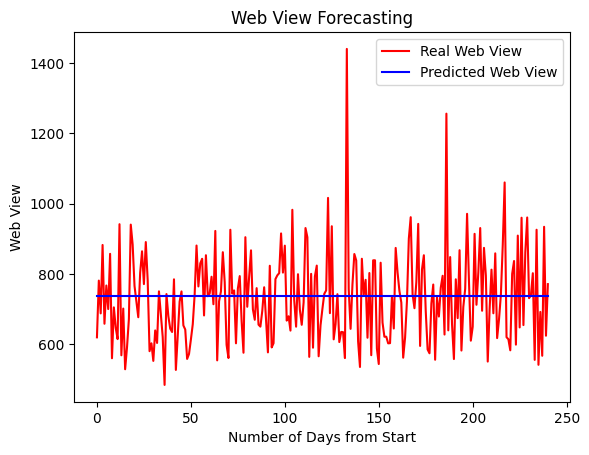

8/8 [==============================] - 0s 1ms/step
SMAPE for de: 18.03


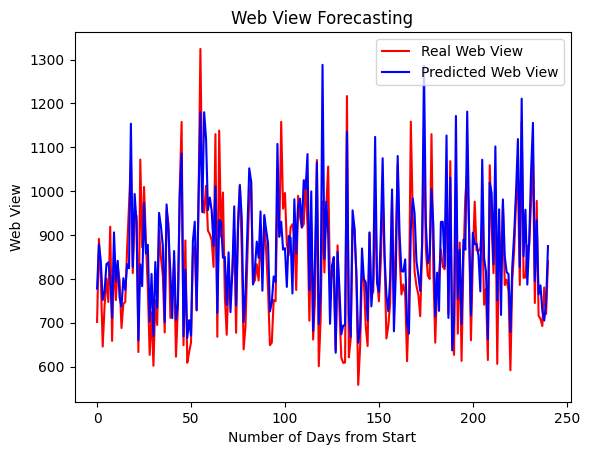

8/8 [==============================] - 0s 1ms/step
SMAPE for na: 24.73


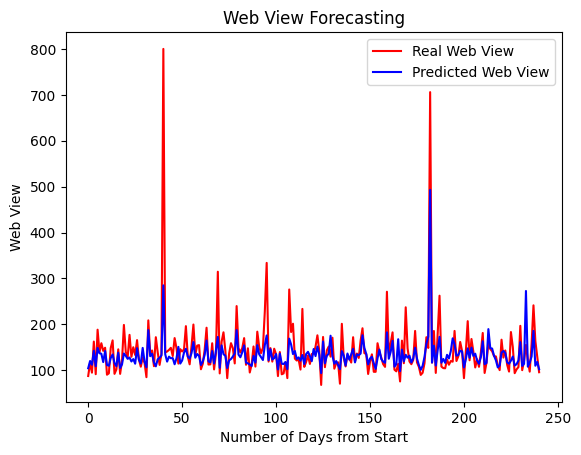

8/8 [==============================] - 0s 1ms/step
SMAPE for fr: 18.72


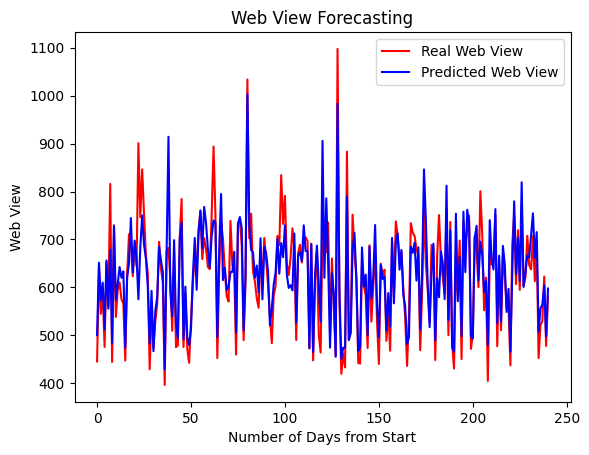

8/8 [==============================] - 0s 1ms/step
SMAPE for zh: 22.80


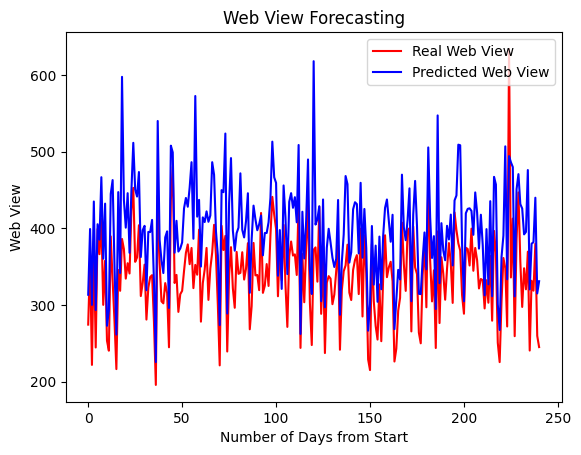

8/8 [==============================] - 0s 1ms/step
SMAPE for ru: 24.60


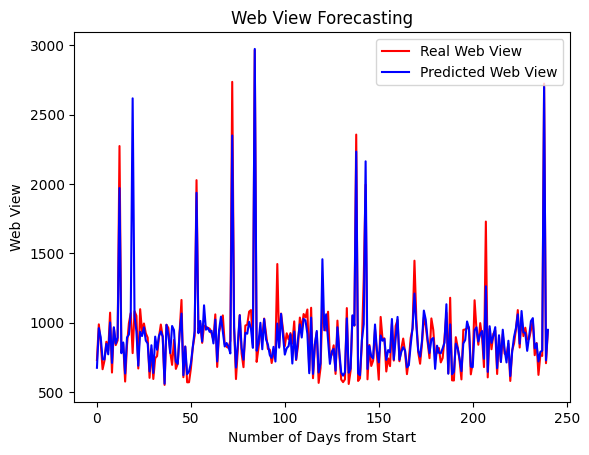

8/8 [==============================] - 0s 1ms/step
SMAPE for es: 21.90


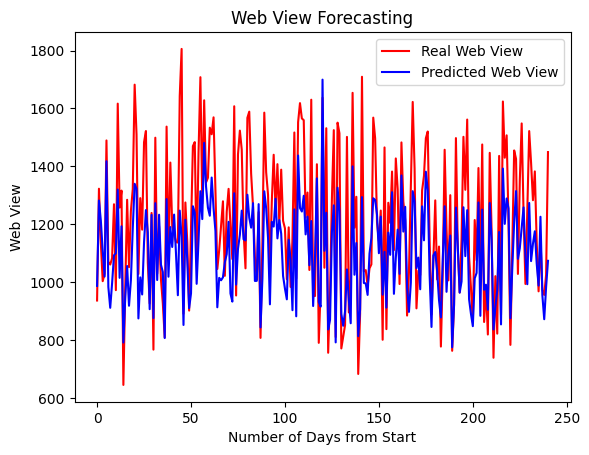

In [35]:
# Iterate over the data
for key in sums:
    row = [0] * sums[key].shape[0]
    for i in range(sums[key].shape[0]):
        row[i] = sums[key][i]

    # Using Data From Random Row for Training and Testing
    X = row[0:802]
    y = row[1:803]

    # Convert lists to NumPy arrays
    X = np.array(X)
    y = np.array(y)

    # Reshape X for LSTM input
    X = X.reshape(-1, 1)

    # Split the dataset into the Training set and Test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # Feature Scaling
    sc = MinMaxScaler()
    X_train_scaled = sc.fit_transform(X_train)
    y_train_reshaped = y_train.reshape(-1, 1)
    y_train_scaled = sc.fit_transform(y_train_reshaped)
    y_train_scaled = y_train_scaled.reshape(-1)

    # Reshape X_train for LSTM input
    X_train_scaled = np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))

    # Initialising the RNN
    regressor = Sequential()

    # Adding the input layer and the LSTM layer
    regressor.add(LSTM(units=8, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))

    # Adding the output layer
    regressor.add(Dense(units=1))

    # Compiling the RNN
    regressor.compile(optimizer='rmsprop', loss='mean_squared_error')

    # Fitting the RNN to the Training set
    regressor.fit(X_train_scaled, y_train_scaled, batch_size=10, epochs=100, verbose=0)

    # Getting the predicted Web View
    inputs = sc.transform(X_test)
    inputs = np.reshape(inputs, (inputs.shape[0], inputs.shape[1], 1))
    y_pred_scaled = regressor.predict(inputs)
    y_pred = sc.inverse_transform(y_pred_scaled)

    # Calculate SMAPE
    smape_value = smape(y_test, y_pred)
    print(f'SMAPE for {key}: {smape_value:.2f}')

    # Visualising Result
    plt.plot(y_test, color='red', label='Real Web View')
    plt.plot(y_pred, color='blue', label='Predicted Web View')
    plt.title('Web View Forecasting')
    plt.xlabel('Number of Days from Start')
    plt.ylabel('Web View')
    plt.legend()
    plt.show()


Create an ensemble of LSTM and ARIMA

8/8 [==============================] - 0s 1ms/step
Ensemble SMAPE for en: 10.47%


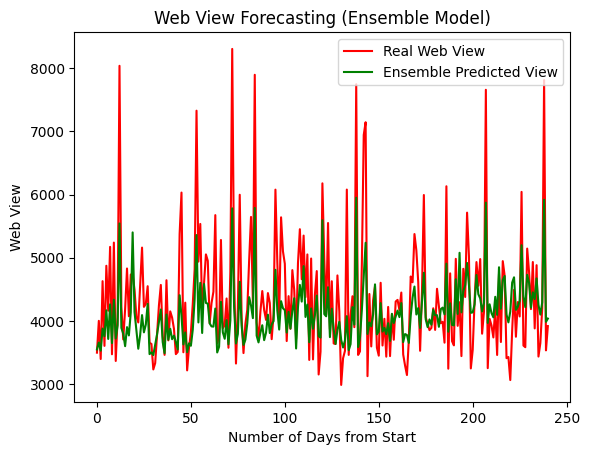

8/8 [==============================] - 0s 1ms/step
Ensemble SMAPE for ja: 10.47%


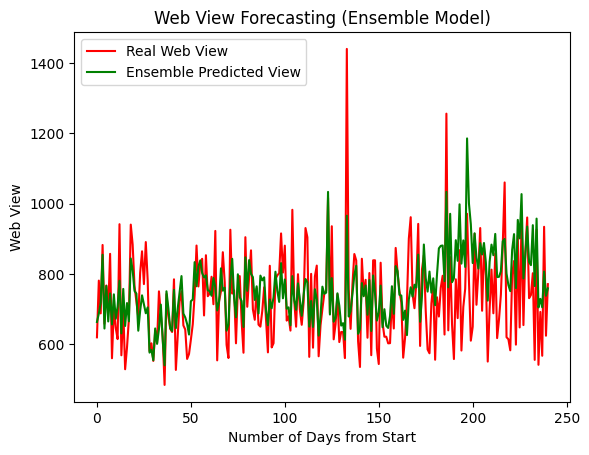

8/8 [==============================] - 0s 1ms/step
Ensemble SMAPE for de: 10.19%


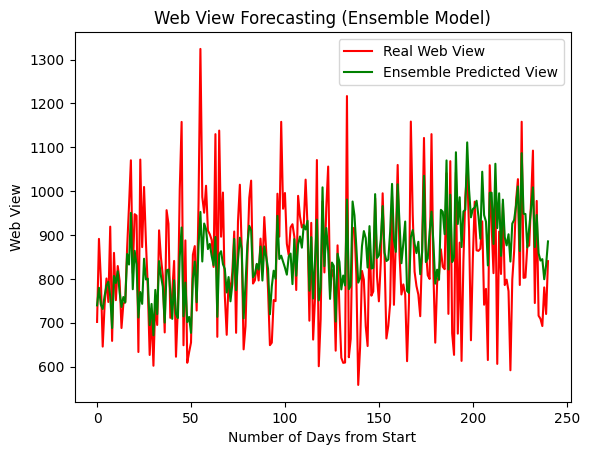

8/8 [==============================] - 0s 2ms/step
Ensemble SMAPE for na: 20.43%


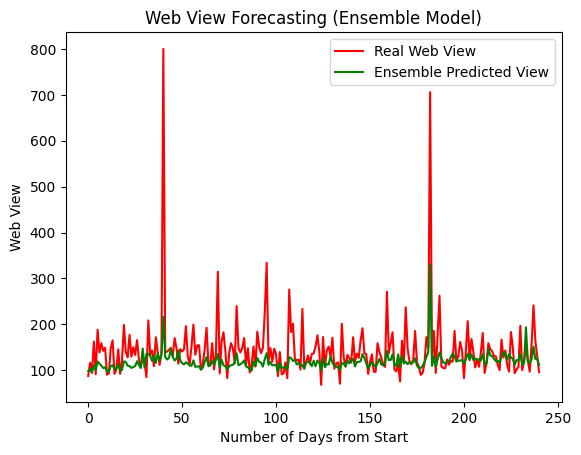

8/8 [==============================] - 0s 2ms/step
Ensemble SMAPE for fr: 11.26%


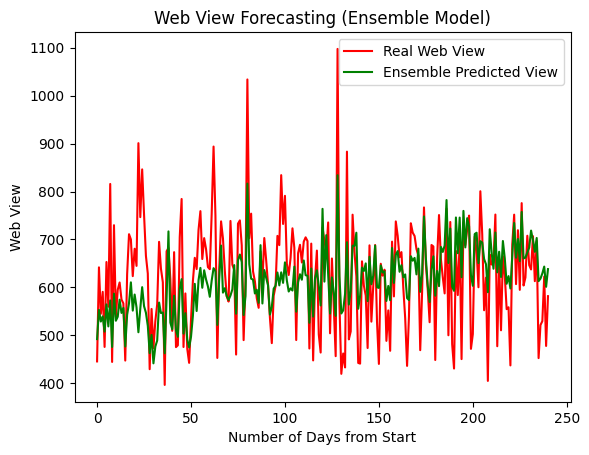

8/8 [==============================] - 0s 1ms/step
Ensemble SMAPE for zh: 9.53%


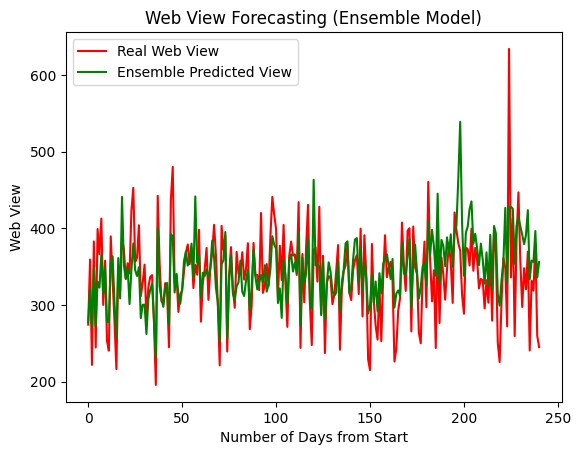

8/8 [==============================] - 0s 1ms/step
Ensemble SMAPE for ru: 13.26%


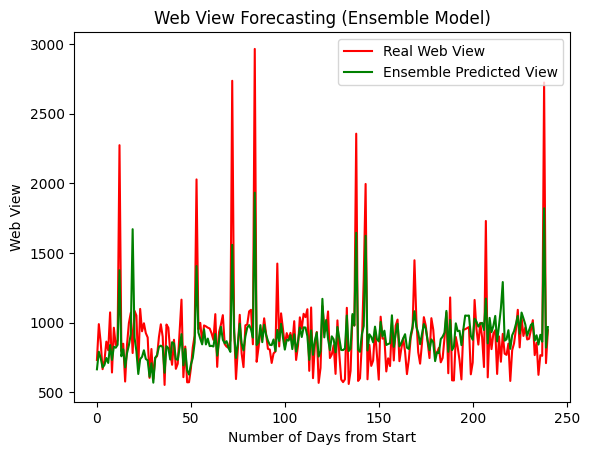

8/8 [==============================] - 0s 2ms/step
Ensemble SMAPE for es: 15.58%


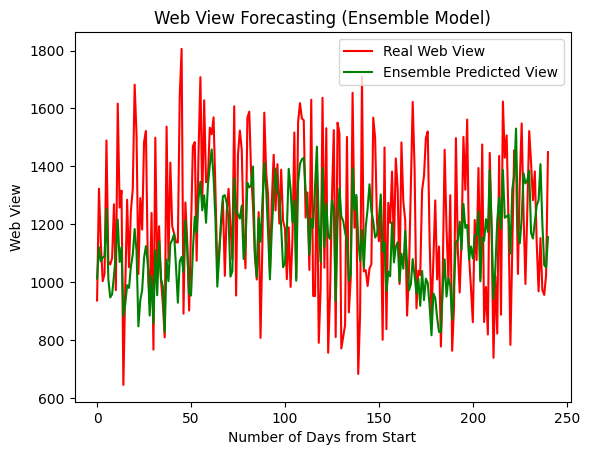

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Define SMAPE function
def smape(y_true, y_pred):
    """
    Calculate Symmetric Mean Absolute Percentage Error (SMAPE)
    """
    numerator = np.abs(y_true - y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    return np.mean(numerator / denominator) * 100

# ARIMA parameters for each key
params = {'en': [4, 1, 0], 'ja': [7, 1, 1], 'de': [7, 1, 1], 'na': [4, 1, 0], 'fr': [4, 1, 0], 'zh': [7, 1, 1], 'ru': [4, 1, 0], 'es': [7, 1, 1]}

# Iterate over the data
for key in sums:
    # ARIMA model
    data = np.array(sums[key])
    arima = ARIMA(data, order=params[key])
    result = arima.fit()
    pred = result.predict(start=2, end=599, type='levels')
    
    # LSTM model
    row = [0] * sums[key].shape[0]
    for i in range(sums[key].shape[0]):
        row[i] = sums[key][i]

    X = row[0:802]
    y = row[1:803]

    X = np.array(X)
    y = np.array(y)

    X = X.reshape(-1, 1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    sc = MinMaxScaler()
    X_train_scaled = sc.fit_transform(X_train)
    y_train_reshaped = y_train.reshape(-1, 1)
    y_train_scaled = sc.fit_transform(y_train_reshaped)
    y_train_scaled = y_train_scaled.reshape(-1)

    X_train_scaled = np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))

    regressor = Sequential()
    regressor.add(LSTM(units=8, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
    regressor.add(Dense(units=1))
    regressor.compile(optimizer='rmsprop', loss='mean_squared_error')
    regressor.fit(X_train_scaled, y_train_scaled, batch_size=10, epochs=100, verbose=0)

    inputs = sc.transform(X_test)
    inputs = np.reshape(inputs, (inputs.shape[0], inputs.shape[1], 1))
    y_pred_scaled = regressor.predict(inputs)
    y_pred = sc.inverse_transform(y_pred_scaled)

    # Ensemble predictions: averaging ARIMA and LSTM predictions
    min_length = min(len(pred), len(y_pred.flatten()))
    ensemble_pred = (pred[:min_length] + y_pred.flatten()[:min_length]) / 2

    # Calculate SMAPE for ensemble model
    ensemble_smape = smape(y_test, ensemble_pred)
    print(f'Ensemble SMAPE for {key}: {ensemble_smape:.2f}%')

    # Visualize results
    plt.plot(y_test, color='red', label='Real Web View')
    plt.plot(ensemble_pred, color='green', label='Ensemble Predicted View')
    plt.title('Web View Forecasting (Ensemble Model)')
    plt.xlabel('Number of Days from Start')
    plt.ylabel('Web View')
    plt.legend()
    plt.show()

In [51]:
y

array([1037.81455683,  954.41268036,  896.05074988,  974.50820954,
       1110.6371455 , 1082.56834174, 1050.66955718, 1030.84128225,
        937.12993105,  842.80865733,  960.24664155, 1089.36555548,
       1144.02580141, 1081.18366622, 1029.5220698 ,  926.54531239,
        806.1572251 ,  862.29739143, 1012.96758831, 1003.3965456 ,
       1032.55270453,  968.78818679,  860.50216789,  771.0791101 ,
        850.39100149,  979.42490582,  972.15153884,  983.06141161,
        935.02324259,  844.75179473,  737.78967944,  809.86331651,
        834.65548369, 1012.46662876, 1024.64823371, 1025.45959201,
        911.17200938,  838.28132774,  916.5881015 ,  979.76224323,
       1137.32212666, 1143.99793873, 1103.54758689,  942.44601606,
        816.30606298,  887.98613974, 1095.09147772, 1196.61745682,
       1205.01165683, 1141.85357879, 1042.52995949,  887.03731609,
       1034.57033194, 1277.17158291, 1482.51297178, 1499.01904897,
       1454.36655057, 1236.65143223,  953.09268605, 1152.96581

In [37]:
ensemble_pred.shape

(241,)

In [39]:
ensemble_pred

array([1012.7345967 , 1121.23209255, 1072.35880663, 1085.48249078,
       1089.43263187, 1253.84286881, 1011.40716356,  947.74802854,
        958.71021413, 1022.34127175, 1096.34347361, 1216.3548984 ,
       1070.28491702, 1120.60485047,  883.92789411,  924.7585853 ,
        989.9744907 ,  980.5124917 , 1054.40971328, 1096.51590289,
       1183.99353666, 1108.88395067,  847.87795625,  938.10146045,
        973.1764251 , 1084.39638932, 1124.93948188, 1067.67927223,
        885.03102591, 1021.60139812,  858.77998357, 1111.15769877,
        955.21100784, 1140.89388569, 1013.72118814,  985.49888479,
        828.68259245, 1079.21015451, 1004.0847579 , 1133.05038776,
       1146.58248607, 1166.90908514, 1054.96019793,  929.41913176,
       1071.97208831, 1087.32404188, 1035.32732934, 1214.24159265,
       1113.47829044,  962.36222386,  954.13412656, 1109.67303602,
       1226.3829003 , 1172.40943569, 1289.90689019, 1347.35588522,
       1248.30045016, 1299.94600259, 1205.51911375, 1336.42293

In [40]:
key_2_file = pd.read_csv("D:\\Personal\\Msc\\Y1S1\\Advanced Data Mining\\GroupAssignment\\web-traffic-time-series-forecasting\\Key\\key_2.csv")

In [41]:
key_2_file.head()

,Page,Id
0,007_スペクター_ja.wikipedia.org_all-access_all-agen...,0b293039387a
1,007_スペクター_ja.wikipedia.org_all-access_all-agen...,7114389dd824
2,007_スペクター_ja.wikipedia.org_all-access_all-agen...,057b02ff1f09
3,007_スペクター_ja.wikipedia.org_all-access_all-agen...,bd2aca21caa3
4,007_スペクター_ja.wikipedia.org_all-access_all-agen...,c0effb42cdd5


In [42]:
# Extract 'id' column from the original DataFrame
id_column = key_2_file['Id']

# Merge 'id' column with the new numpy array
new_column = pd.Series(ensemble_pred, name='Visits')
scaled_results_df = pd.concat([id_column, new_column], axis=1)

In [44]:
print("Length of 'Id' column:", len(id_column))
print("Length of ensemble predictions:", len(ensemble_pred))

Length of 'Id' column: 8993906
Length of ensemble predictions: 241


In [43]:
scaled_results_df

,Id,Visits
0,0b293039387a,1012.734597
1,7114389dd824,1121.232093
2,057b02ff1f09,1072.358807
3,bd2aca21caa3,1085.482491
4,c0effb42cdd5,1089.432632
...,...,...
8993901,f78fbaa305ad,NaN
8993902,33aecaf259d1,NaN
8993903,a36228b64466,NaN
8993904,26887d3e5c99,NaN
